## Artıklar ve Makine Öğrenmesindeki Önemi

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()

In [50]:
mse = mean_squared_error(y, model.fittedvalues)

In [51]:
mse # tahmin edilen değerler ile gerçek değerlerin farklarının karelerinin ortalaması (hata kareler ortalaması)
# bu değer birim başına yapılabilecek ortalama hatayı gösteriyor

10.512652915656757

In [52]:
import numpy as np
rmse = np.sqrt(mse)
rmse

3.2423221486546887

In [53]:
reg.predict(X)[0:10] # regresyon üzerinden tahmin yaptırdık, yukarıdaki modul = reg.fit(X,y) kısmı önemli

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [54]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [55]:
k_t = pd.DataFrame({"gercek_y": y, "tahmin_y": reg.predict(X)})

In [56]:
k_t[0:10]

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [57]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]

In [58]:
k_t.head()

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218


In [59]:
k_t["hata_kare"] = k_t["hata"]**2

In [60]:
k_t.head()

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719


In [61]:
np.sum(k_t["hata_kare"])

2102.5305831313512

In [62]:
np.mean(k_t["hata_kare"])

10.512652915656757

In [63]:
np.sqrt(np.mean(k_t["hata_kare"])) # hata kareleri ortalamasının karekök değeri

3.2423221486546887

In [64]:
k_t["hata_abs"] = k_t["hata"].abs()

In [65]:
k_t["hata_abs"].mean() # hata mutlak değerler ortalaması

2.549806038927486

In [66]:
model.resid[0:10] # artıklar

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

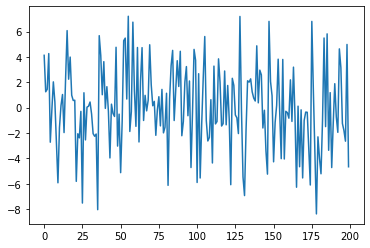

In [67]:
plt.plot(model.resid); # artıkların görselleştirilmesi , buralardaki hatanın 8 ve -8 değerlerine yakın olduğu noktalar önemli

# ----------------------------------------------------------------------

Regresyon modellerinde hata değerleri hesaplanıp optimum parametreler bulunmaya çalışılınır:

#### Yapay sinir ağlarında hatalar (artıklar):

a -> Tekrar dağıtılıp bir ceza işlemi gerçekleştirilip bir iterasyon sonrası küçültülmeye çalışılır

#### Ağaca dağalı yöntemlerde:

a -> Model kurulduktan sonraya ortaya çıkan artıklar üzerine birdaha model kurulur (additive model) -> buradan elde edilen hatalar üzerinde birdaha model kurulur ve işlem böyle devam eder. Sonuçta kümülatif olarak hatalar üzerine tek bir model formunda görülen bir modeller serisi oluşturularak hata optimizasyonuna ulaşmaya çalışılır.

 Bu uygulamalarda genel amacımız hata optimizasyonu oluyor. Ne yapmaya çalışıyorduk ?= 
 
 #### *Makine öğrenmesinde amaç her zaman buradaki hataları minimum yapacak şekilde ilgili parametrelere ulaşmak olacaktır.*


## Kritik Bilgi (veri seti gözlemleri ve hatalara yaklaşım üzerine) :

Hatayı muhattaplara sunarken direkt rmse, sme, mae gibi şekillerde sunmak aldatıcı olur. 

Modeli yaptıktan sonra hatayı sunarken HATALARIN DAĞILIMINA bakmak gerekir. 

#### Burada hataları görselleştirip, başarılı ve başarısız olduğumuz kısımları incelememiz gerekir.

Hata raporunuz: "Veri setinin %95'inde 0.001 hata yaptım, geri kalan %5'inde X kadar hata yaptım." şeklinde olmalı.

Geri kalan %5'e odaklanıp:

*Gözlemlerin kendilerine gidip yapısal bir sıknıtı olup olmadığını incelememiz gerekir.*

*Gözlemlerin taşıdığı karakteristiği (aykırılıklara vesaire) odaklanmamız ve neden başarılı tahmin yapamadığımıza odaklanmamız gerekir*

Bu şekilde neden doğru tahmin yapılamadığını düşünen kişilerin algoritmalarını bugün kullanıyoruz. Yani %5'e odaklanma fikrini 1990'larda pratiğe geçiren insanların.